<a href="https://colab.research.google.com/github/KaryampudiMadhav/MachineLearningFromScracth/blob/main/support_vector_regression_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv')
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

Text(0.5, 1.0, 'SalaryPrediction')

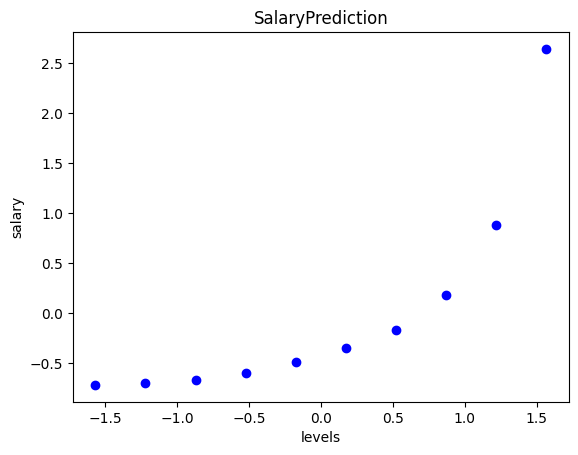

In [13]:
plt.scatter(X,y,color='blue')
plt.xlabel('levels')
plt.ylabel('salary')
plt.title('SalaryPrediction')

## Feature Scaling

In [7]:
# we need to convert the 1D
# target variable into the 2D target variable to scale the target
# vector beacause the StandardScalar applies for only 2D array
y = y.reshape((len(y),1))
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [9]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y  = sc_y.fit_transform(y)
X  = sc_x.fit_transform(X)

In [10]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [11]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [16]:
from sklearn.svm import SVR
regression = SVR(kernel='rbf')
regression.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [18]:
v =sc_y.inverse_transform(regression.predict(sc_x.transform([[6.5]])).reshape(-1,1))
v

array([[170370.0204065]])

## Visualising the SVR results

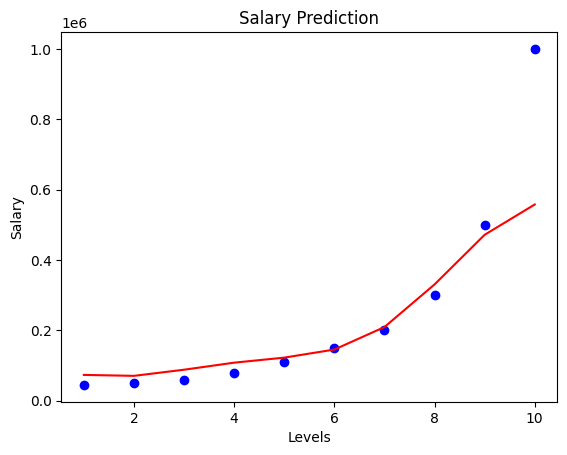

In [22]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='blue')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regression.predict(X).reshape(-1,1)),color='red')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)